In [1]:
path = 'example.txt'
open(path).readlines()


['{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n',
 '{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\n',
 '{ "a": "Mozilla\\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media

* 从上面我们可以看出使用文件路径去打开文件，再使用readline或者是readlines去打开以
你想的方式去读取。

In [2]:
import json
records = [json.loads(line) for line in open(path).readlines()]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

* 上面使用了json模块，使用json内部自带的loads函数把刚刚的一堆数据拆成了这里的这些数
据，但是其实也就是打印除了第一行数据。但是划分的很舒服。

In [3]:
records[0]['tz']

'America/New_York'

* 使用二维方式得到具体的数据。
> 其实本质就是一堆字典套在一个大的文件里面，
> 而每一个字典又有很多的key-value键值对，所以能够访问，非常快捷。

In [4]:
# timezones = [rec['tz'] for rec in records]
# print(timezones)

* 注意这里必须得注意，在处理数据时并不是每一个数据都是有效的，
    而是存在很多中数据没有这个东西所以得筛选

In [5]:
timezones = [rec['tz'] for rec in records if 'tz' in rec]
print(timezones)

['America/New_York', 'America/Denver', 'America/New_York', 'America/Sao_Paulo', 'America/New_York', 'America/New_York', 'Europe/Warsaw', '', '', '', 'America/Los_Angeles', 'America/New_York', 'America/New_York', 'America/New_York', 'Asia/Hong_Kong', 'Asia/Hong_Kong', 'America/New_York', 'America/Denver', 'Europe/Rome', 'Africa/Ceuta', 'America/New_York', 'America/New_York', 'America/New_York', 'Europe/Madrid', 'Asia/Kuala_Lumpur', 'Asia/Nicosia', 'America/Sao_Paulo', '', '', 'Europe/London', 'America/New_York', 'Pacific/Honolulu', 'America/Chicago', '', '', 'Pacific/Honolulu', '', 'America/New_York', 'America/New_York', 'America/New_York', 'America/Chicago', 'Europe/Rome', 'America/New_York', 'America/New_York', 'America/Los_Angeles', '', '', 'America/New_York', 'America/New_York', 'Europe/Malta', 'America/New_York', 'America/New_York', '', 'America/Los_Angeles', 'America/Sao_Paulo', '', 'Asia/Hong_Kong', 'Asia/Hong_Kong', 'Pacific/Honolulu', 'Pacific/Honolulu', 'Pacific/Honolulu', 'Am

* 看这里的数据我们在列表解析式上面写了if 'tz' in rec 相当
于筛选了我们刚刚准备挑出的tz避免了由于推导列表时无法找到对应的
数据而报错，可以见得python是一门很好的语言清晰明了。

In [6]:
from collections import defaultdict
def get_counts1(list):
    counts = { }
    for x in list:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
def get_counts2(list):
    counts = defaultdict(int)
    for x in list:
        counts[x] += 1
    return counts
result = get_counts1(timezones)
result['America/New_York']

1251

* 这样我们就可以对这个表中特定的东西进行统计了。而且一共有如上这两种方法去找到这些统计数据。


In [7]:
len(timezones)

3440

* 一共有这么多的数据总数，而上面可以看出American一个人就占了那么多，


In [8]:
def topposition(dic,n=10):
    top = { }
    top = [(counts , key) for key , counts in dic.items()]
    top.sort()
    return top[-n:]
top = topposition(result)
print(top[::-1],end='')

[(1251, 'America/New_York'), (521, ''), (400, 'America/Chicago'), (382, 'America/Los_Angeles'), (191, 'America/Denver'), (74, 'Europe/London'), (37, 'Asia/Tokyo'), (36, 'Pacific/Honolulu'), (35, 'Europe/Madrid'), (33, 'America/Sao_Paulo')]

* 上面使用的字典的反转，将数字作为字典里面的value然后输出比较那些大小使用sort函数对其进行顺序打印。
> 同样的最后面那个top[::-1]这个也是反转的意思，这样我们就得到了降序排列的字典。



In [9]:
from collections import Counter
counts = Counter(result)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

* Counter 类里面有这么一个东西让，这里的most_common方法可以将其头部的打印下来，
这时就不需要字典反转了。

In [10]:
import pandas as pd
frame = pd.DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [11]:
frame['gr'][:10]

0     MA
1     UT
2     DC
3     27
4     MA
5     MA
6     77
7    NaN
8    NaN
9    NaN
Name: gr, dtype: object

In [12]:
frame['tz'][:100]

0      America/New_York
1        America/Denver
2      America/New_York
3     America/Sao_Paulo
4      America/New_York
            ...        
95     America/New_York
96      Europe/Brussels
97    America/Sao_Paulo
98     America/New_York
99    America/Vancouver
Name: tz, Length: 100, dtype: object

* 上面使用的就是pandas的强大制图功能，我们导入一个巨大字典，


* 刚才我们在上面看到有很多空行，可以使用fillna来填补缺失值NA


In [13]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknow'
tz_counts = clean_tz.value_counts()
tz_counts[:10]


America/New_York       1251
Unknow                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

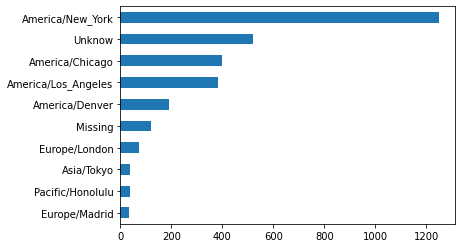

In [14]:
from matplotlib import pyplot as plt
tz_counts[:10][::-1].plot(kind='barh', rot=0)



> 字典可以直接使用matplotlib中的制图plot来得出条形图片。


In [15]:
from pandas import Series
result2 = Series([x.split()[0] for x in frame.a.dropna()])
result2.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

* 这就仅仅是一个引言没啥东西.
